In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [17]:
# Suponha que um médico está interessado em estudar a relação entre as despesas mensais com a saúde e os rendimentos dos portugueses. Recolheu-se informação (em milhares de euros) relativa
# a 15 famílias, tendo-se obtido os seguintes dados:

In [18]:
dataset = pd.read_csv('setubal_exercicio_9_4.csv')
print(dataset.shape)
dataset.head()

(15, 2)


,Rendimento,Despesa
0,2.5,0.140
1,1.7,0.106
2,1.3,0.100
3,2.3,0.120
4,2.7,0.150


[[1.         0.80986938]
 [0.80986938 1.        ]]
[[1.         0.65588841]
 [0.65588841 1.        ]]


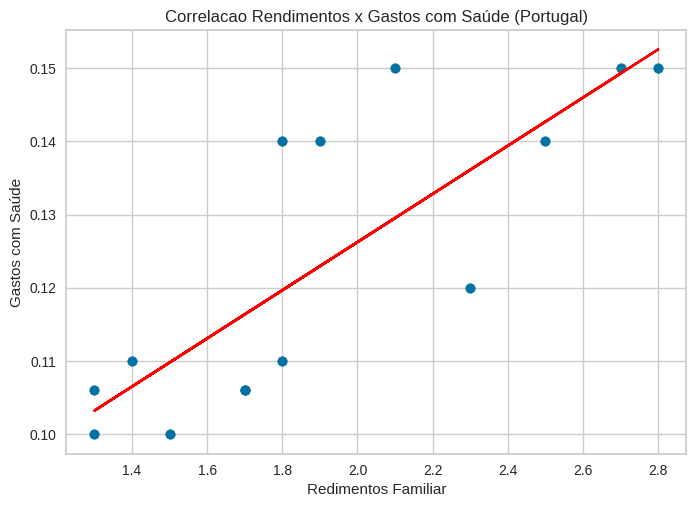

In [19]:
# 1. Represente as observações num diagrama de dispersão.
# 2. A representação anterior sugere a existência de alguma relação linear entre as variáveis em estudo?
# 3. Calcule o coeficiente de correlação linear empírico e obtenha a expressão da recta dos mínimos quadrados. Comente o resultado obtido.

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

x = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

correlacao = np.corrcoef(x, y)
print(correlacao) # Coeficiente de Correlação
print(correlacao ** 2) # Coeficiente de Determinação

x = x.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(x, y)

# Geração do gráfico com os pontos reais e as previsões
plt.scatter(x, y)
plt.title('Correlacao Rendimentos x Gastos com Saúde (Portugal)')
plt.ylabel('Gastos com Saúde')
plt.xlabel('Redimentos Familiar')
plt.plot(x, modelo.predict(x), color = 'red')


In [20]:
# Tratando os dados para pegar do primeiro quartil até o terceiro quartil, evitando-se assim outiliers, o coeficiente de correlação é de R = 0.8098 e o coeficiente de determinação é de 0.6558. Conclusão, há uma forte correlação positiva entre os rendimentos de uma família portuguesa e seus gastos com saúde. No modelo, 65.58% da variável dependente são explicados pela variável independente.

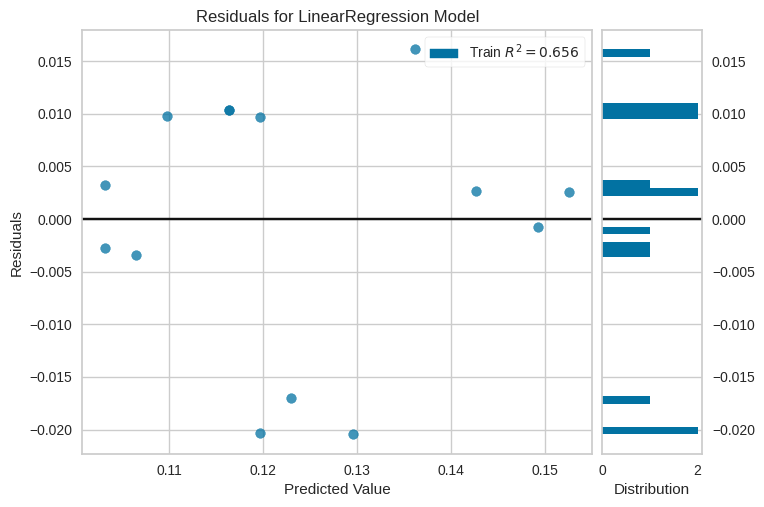

array([0.10982259])

In [21]:
# 4. Calcule os resíduos, analise-os graficamente e conclua acerca da quali- dade do ajustamento efectuado.
# 6. Obtenha uma estimativa para os gastos com a saúde de uma família cujos rendimentos mensais são de 1500 euros e comente a sua qualidade.

# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

modelo.predict([[1.5]])

In [22]:
# No modelo previsão criado, eliminado outliers, pelo ajuste do 1ºQ - 3ºQ (Quartis), temos que um rendimento de 1500 euros mensais uma família portuguesa teria um gasto com saúde na base de 109.82 euros.